# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [31]:
import pandas as pd
import os


columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
# Load the data
fires_dt = (pd.read_csv('C:/Users/14372/scaling_to_production/05_src/data/fires/forestfires.csv', header=None, names=columns, skiprows=1))
fires_dt

,coord_x,coord_y,month,day,ffmc,dmc,dc,isi,temp,rh,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [32]:
import numpy as np
fires_dt_adjusted = fires_dt.copy()

columns = ['coord_x', 'coord_y','ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind','rain','area']

for c in columns:
    fires_dt_adjusted[c] = fires_dt_adjusted[c].apply(lambda x : float(x))

In [33]:
print ("fires_dt.shape" , fires_dt.shape)

print ("fires_dt_adjusted.shape" , fires_dt_adjusted.shape)

fires_dt.shape (517, 13)
fires_dt_adjusted.shape (517, 13)


# Get X and Y

Create the features data frame and target data.

In [34]:
from sklearn.model_selection import train_test_split

# The model objective is to predict the area affected by forest fires given the features set. 
x_df = fires_dt_adjusted.drop (columns=['area'], axis=1)

y_df = fires_dt_adjusted['area']

X_train, X_test, Y_train, Y_test = train_test_split(x_df, y_df, test_size = 0.3, random_state = 42)

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [36]:
cat_cols = ['month', 'day']
num_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']


# numerical Variables
pipe_num_cols = Pipeline([
    ('standardizer', RobustScaler())
])

# categorical Variables
pipe_cat_cols = Pipeline([
   ('standardizer', OneHotEncoder(handle_unknown='infrequent_if_exist') )
])

preproc1 = ColumnTransformer([
    ('num', pipe_num_cols, num_cols),
    ('cat', pipe_cat_cols, cat_cols)]
    , remainder='drop'

    )

preproc1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardizer',
                                                  RobustScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat',
                                 Pipeline(steps=[('standardizer',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                 ['month', 'day'])])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [37]:
# preproc2

# Define categorical and numeric columns
cat_cols = ['month', 'day']
num_cols = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']


# Apply Yeo-Johnson transformation, scale numeric variables, one-hot encoding for categorical variables
preproc2 = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('yeo_johnson', PowerTransformer(method='yeo-johnson')),
            ('scaler', StandardScaler())
        ]), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ]
)

preproc2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('yeo_johnson',
                                                  PowerTransformer()),
                                                 ('scaler', StandardScaler())]),
                                 ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  'isi', 'temp', 'rh', 'wind', 'rain']),
                                ('cat', OneHotEncoder(), ['month', 'day'])])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [38]:
# Baseline regressor
baseline_regressor = LinearRegression()

# Advanced regressor
advanced_regressor = RandomForestRegressor(random_state=42)

In [39]:
# Pipeline A: preproc1 + baseline
pipeline_a = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', baseline_regressor)
])
pipeline_a

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardizer',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('standardizer',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [40]:
# Pipeline B: preproc2 + baseline
pipeline_b = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', baseline_regressor)
])
pipeline_b

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('yeo_johnson',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat', OneHotEncoder(),
                                                  ['month', 'day'])])),
                ('regressor', LinearRegression())])

In [41]:
# Pipeline C: preproc1 + advanced model
pipeline_c = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', advanced_regressor)
])
pipeline_c

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardizer',
                                                                   RobustScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat',
                                                  Pipeline(steps=[('standardizer',
                                                                   OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [42]:
# Pipeline D: preproc2 + advanced model
pipeline_d = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', advanced_regressor)
])
pipeline_d

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('yeo_johnson',
                                                                   PowerTransformer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['coord_x', 'coord_y', 'ffmc',
                                                   'dmc', 'dc', 'isi', 'temp',
                                                   'rh', 'wind', 'rain']),
                                                 ('cat', OneHotEncoder(),
                                                  ['month', 'day'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [43]:
pipeline_a.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('standardizer',
                                                     RobustScaler())]),
                                    ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                     'isi', 'temp', 'rh', 'wind', 'rain']),
                                   ('cat',
                                    Pipeline(steps=[('standardizer',
                                                     OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                    ['month', 'day'])])),
  ('regressor', LinearRegression())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('standardizer',
                                                   RobustScaler())]),
                                  ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
     

In [44]:
# Pipeline A = preproc2 + baseline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

scoring = ['neg_root_mean_squared_error'] 

# Parameters for Linear Regression
param_grid_lr = {
    'regressor__copy_X': [True, False],
    'regressor__fit_intercept': [True, False]
}

grid_cv_A = GridSearchCV( 
    estimator  = pipeline_a, 
    param_grid = param_grid_lr, 
    scoring    = scoring, 
    cv         = 5,
    refit = "neg_root_mean_squared_error",
    return_train_score=True) 

grid_cv_A.fit(X_train , Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False]},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring=['neg_root_mean_squared_error'])

In [45]:
pd.DataFrame(grid_cv_A.cv_results_).sort_values('rank_test_neg_root_mean_squared_error')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__copy_X,param_regressor__fit_intercept,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,...,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error
0,0.012571,0.007245,0.004645,0.001087,True,True,"{'regressor__copy_X': True, 'regressor__fit_in...",-44.160022,-26.247083,-31.031591,...,-43.966592,24.261029,1,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041
2,0.010778,0.000978,0.004582,0.001343,False,True,"{'regressor__copy_X': False, 'regressor__fit_i...",-44.160022,-26.247083,-31.031591,...,-43.966592,24.261029,1,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041
1,0.010770,0.001322,0.004375,0.000787,True,False,"{'regressor__copy_X': True, 'regressor__fit_in...",-44.160022,-26.247083,-31.031591,...,-43.967334,24.252766,3,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041
3,0.010179,0.001150,0.004201,0.000990,False,False,"{'regressor__copy_X': False, 'regressor__fit_i...",-44.160022,-26.247083,-31.031591,...,-43.967334,24.252766,3,-48.210735,-51.180599,-51.307089,-28.322627,-51.036514,-46.011513,8.919041


In [46]:
pipeline_b.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('yeo_johnson',
                                                     PowerTransformer()),
                                                    ('scaler', StandardScaler())]),
                                    ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                     'isi', 'temp', 'rh', 'wind', 'rain']),
                                   ('cat', OneHotEncoder(), ['month', 'day'])])),
  ('regressor', LinearRegression())],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('yeo_johnson',
                                                   PowerTransformer()),
                                                  ('scaler', StandardScaler())]),
                                  ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                  

In [47]:
# Pipeline B = preproc2 + baseline
from sklearn.model_selection import GridSearchCV

scoring = ['neg_root_mean_squared_error']


# Parameters for Linear Regression
param_grid_lr = {
    'regressor__copy_X': [True, False],
    'regressor__fit_intercept': [True, False]
}


grid_cv_B = GridSearchCV( 
    estimator  = pipeline_b, 
    param_grid = param_grid_lr, 
    scoring    = scoring, 
    cv         = 5,
    refit = "neg_root_mean_squared_error",
    return_train_score=True) 

grid_cv_B.fit(X_train , Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('yeo_johnson',
                                                                                          PowerTransformer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False]},
             refit='neg_root_mean_squared_error', return_train_score=True,
             scoring=['neg_root_mean_squared_error'])

In [48]:
pd.DataFrame(grid_cv_B.cv_results_).sort_values('rank_test_neg_root_mean_squared_error')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__copy_X,param_regressor__fit_intercept,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,...,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_train_neg_root_mean_squared_error,split1_train_neg_root_mean_squared_error,split2_train_neg_root_mean_squared_error,split3_train_neg_root_mean_squared_error,split4_train_neg_root_mean_squared_error,mean_train_neg_root_mean_squared_error,std_train_neg_root_mean_squared_error
0,0.033713,0.016648,0.006683,0.004891,True,True,"{'regressor__copy_X': True, 'regressor__fit_in...",-44.015169,-26.283736,-25.645497,...,NaN,NaN,1,-48.143661,-51.046678,-51.244535,-28.220045,-50.919049,-45.914794,8.92028
1,0.027932,0.002601,0.005589,0.001639,True,False,"{'regressor__copy_X': True, 'regressor__fit_in...",-44.015169,-26.283736,-25.645497,...,NaN,NaN,1,-48.143661,-51.046678,-51.244535,-28.220045,-50.919049,-45.914794,8.92028
2,0.025719,0.001164,0.005199,0.001166,False,True,"{'regressor__copy_X': False, 'regressor__fit_i...",-44.015169,-26.283736,-25.645497,...,NaN,NaN,1,-48.143661,-51.046678,-51.244535,-28.220045,-50.919049,-45.914794,8.92028
3,0.045877,0.022059,0.005984,0.001262,False,False,"{'regressor__copy_X': False, 'regressor__fit_i...",-44.015169,-26.283736,-25.645497,...,NaN,NaN,1,-48.143661,-51.046678,-51.244535,-28.220045,-50.919049,-45.914794,8.92028


In [49]:
pipeline_c.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('standardizer',
                                                     RobustScaler())]),
                                    ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                     'isi', 'temp', 'rh', 'wind', 'rain']),
                                   ('cat',
                                    Pipeline(steps=[('standardizer',
                                                     OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                    ['month', 'day'])])),
  ('regressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('standardizer',
                                                   RobustScaler())]),
                                  ['coord_x', 'coord_y', 'ffmc'

In [50]:
# Pipeline C = preproc2 + advanced model

scoring = ['neg_log_loss'] 

# Parameters for Random Forest
param_grid_rf = {
    'regressor__bootstrap': [True, False],
    'regressor__max_depth': [1, 5, 10, 15],
    'regressor__n_estimators': [100, 200, 300, 400, 500]
}

# Grid search for pipeline C
grid_cv_C = GridSearchCV(
    estimator=pipeline_c, 
    param_grid=param_grid_rf, 
    cv=5,
    return_train_score=True
)

# Fit the GridSearchCV
grid_cv_C.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          RobustScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('standardizer',
                                                                                          OneHotEncoder(handle_unknown='infrequent_if_exist'))]),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__bootstrap': [True, False],
                         'regressor__max_depth': [1, 5, 10, 15],
                         'regressor__n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [51]:
pd.DataFrame(grid_cv_C.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__bootstrap,param_regressor__max_depth,param_regressor__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.605561,0.048935,0.031116,0.002993,True,1,500,"{'regressor__bootstrap': True, 'regressor__max...",-0.166621,-0.041774,...,-0.107127,0.083329,1,0.069953,0.051328,0.065513,0.056456,0.050727,0.058795,0.007694
2,0.379574,0.031355,0.019560,0.003246,True,1,300,"{'regressor__bootstrap': True, 'regressor__max...",-0.153089,-0.047439,...,-0.107165,0.083314,2,0.069849,0.051875,0.066658,0.056897,0.051709,0.059398,0.007535
3,0.495068,0.015053,0.023552,0.001190,True,1,400,"{'regressor__bootstrap': True, 'regressor__max...",-0.155788,-0.048717,...,-0.107225,0.082486,3,0.069037,0.051833,0.065809,0.056792,0.051352,0.058964,0.007236
1,0.266860,0.045168,0.014754,0.000764,True,1,200,"{'regressor__bootstrap': True, 'regressor__max...",-0.161922,-0.053855,...,-0.114607,0.086378,4,0.069128,0.051625,0.067142,0.056364,0.053657,0.059583,0.007170
23,0.315557,0.002247,0.021936,0.001089,False,1,400,"{'regressor__bootstrap': False, 'regressor__ma...",-0.243272,-0.003501,...,-0.122665,0.128918,5,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
24,0.391368,0.001486,0.026920,0.000895,False,1,500,"{'regressor__bootstrap': False, 'regressor__ma...",-0.243272,-0.003501,...,-0.122665,0.128918,6,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
22,0.238363,0.001409,0.017945,0.000882,False,1,300,"{'regressor__bootstrap': False, 'regressor__ma...",-0.243272,-0.003501,...,-0.122665,0.128918,7,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
21,0.162366,0.001711,0.012763,0.000384,False,1,200,"{'regressor__bootstrap': False, 'regressor__ma...",-0.243272,-0.003501,...,-0.122665,0.128918,8,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
20,0.085367,0.001188,0.008976,0.000898,False,1,100,"{'regressor__bootstrap': False, 'regressor__ma...",-0.243272,-0.003501,...,-0.122665,0.128918,9,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
0,0.126513,0.006370,0.010364,0.001616,True,1,100,"{'regressor__bootstrap': True, 'regressor__max...",-0.196181,-0.058677,...,-0.127396,0.101156,10,0.067876,0.052068,0.067332,0.055358,0.051659,0.058858,0.007257


In [52]:
pipeline_d.get_params()

{'memory': None,
 'steps': [('preprocessing',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('yeo_johnson',
                                                     PowerTransformer()),
                                                    ('scaler', StandardScaler())]),
                                    ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
                                     'isi', 'temp', 'rh', 'wind', 'rain']),
                                   ('cat', OneHotEncoder(), ['month', 'day'])])),
  ('regressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'preprocessing': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('yeo_johnson',
                                                   PowerTransformer()),
                                                  ('scaler', StandardScaler())]),
                                  ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc',
              

In [53]:
# Pipeline D = preproc2 + advanced model

scoring = ['neg_log_loss'] 

# Parameters for Random Forest
param_grid_rf = {
    'regressor__bootstrap': [True, False],
    'regressor__max_depth': [1, 5, 10, 15],
    'regressor__n_estimators': [100, 200, 300, 400, 500]
}

# Grid search for pipeline C
grid_cv_D = GridSearchCV(
    estimator=pipeline_d, 
    param_grid=param_grid_rf, 
    cv=5,
    return_train_score=True
)

# Fit the GridSearchCV
grid_cv_D.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('yeo_johnson',
                                                                                          PowerTransformer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['coord_x',
                                                                          'coord_y',
                                                                          'ffmc',
                                                                          'dmc',
                                                                          'dc',
                                                                          'isi',
                                                                          'temp',
                                                                          'rh',
                                                                          'wind',
                                                                          'rain']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['month',
                                                                          'day'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'regressor__bootstrap': [True, False],
                         'regressor__max_depth': [1, 5, 10, 15],
                         'regressor__n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [54]:
pd.DataFrame(grid_cv_D.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__bootstrap,param_regressor__max_depth,param_regressor__n_estimators,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.142830,0.008139,0.007982,0.002693,True,1,100,"{'regressor__bootstrap': True, 'regressor__max...",-0.178271,-0.058413,...,NaN,NaN,1,0.067876,0.052107,0.067332,0.055358,0.051836,0.058902,0.007215
22,0.289812,0.037771,0.014767,0.008865,False,1,300,"{'regressor__bootstrap': False, 'regressor__ma...",-0.215331,-0.003501,...,NaN,NaN,1,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
23,0.383162,0.024665,0.019755,0.010459,False,1,400,"{'regressor__bootstrap': False, 'regressor__ma...",-0.215331,-0.003501,...,NaN,NaN,1,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
24,0.464343,0.046917,0.019560,0.011251,False,1,500,"{'regressor__bootstrap': False, 'regressor__ma...",-0.215331,-0.003501,...,NaN,NaN,1,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
25,0.173942,0.003479,0.007978,0.002958,False,5,100,"{'regressor__bootstrap': False, 'regressor__ma...",-4.603200,-1.402213,...,NaN,NaN,1,0.847719,0.860954,0.892081,0.525922,0.863649,0.798065,0.136837
26,0.325329,0.011184,0.010173,0.005143,False,5,200,"{'regressor__bootstrap': False, 'regressor__ma...",-4.603200,-1.394574,...,NaN,NaN,1,0.847719,0.860954,0.892081,0.525922,0.863649,0.798065,0.136837
27,0.535401,0.101316,0.014158,0.006406,False,5,300,"{'regressor__bootstrap': False, 'regressor__ma...",-4.603210,-1.397803,...,NaN,NaN,1,0.847719,0.860954,0.892081,0.525922,0.863649,0.798065,0.136837
28,0.775331,0.086708,0.021342,0.014874,False,5,400,"{'regressor__bootstrap': False, 'regressor__ma...",-4.603232,-1.392403,...,NaN,NaN,1,0.847719,0.860954,0.892081,0.525922,0.863649,0.798065,0.136837
21,0.199475,0.014613,0.011349,0.003829,False,1,200,"{'regressor__bootstrap': False, 'regressor__ma...",-0.215331,-0.003501,...,NaN,NaN,1,0.054584,0.030693,0.041108,0.032714,0.030530,0.037926,0.009185
29,0.861683,0.057950,0.021336,0.013021,False,5,500,"{'regressor__bootstrap': False, 'regressor__ma...",-4.603221,-1.389925,...,NaN,NaN,1,0.847719,0.860954,0.892081,0.525922,0.863649,0.798065,0.136837


# Evaluate

+ Which model has the best performance?

Model A (Pipeline A: preproc1 + LinearRegression)
Mean Train Neg RMSE: -46.011513
Interpretation: The negative root mean squared error (RMSE) on the training set is approximately 46.01. A lower RMSE indicates better performance, but since this is a negative value (as required by the scoring parameter), closer to zero is better.
Model B (Pipeline B: preproc2 + LinearRegression)
Mean Train Neg RMSE: -45.914794
Interpretation: The negative RMSE on the training set is approximately 45.91. This model has a slightly better (lower) RMSE on the training set compared to Model A.
Model C (Pipeline C: preproc1 + RandomForestRegressor)
Mean Train Score: 0.058795
Interpretation: This score likely refers to the mean cross-validation score on the training set, where a higher value indicates better performance. Since the score here is not negative RMSE, it seems like this might be an error in interpreting the score. Generally, for regression tasks, we should look at RMSE or R² scores.
Model D (Pipeline D: preproc2 + RandomForestRegressor)
Mean Train Score: 0.058902
Interpretation: Similar to Model C, this score likely represents a mean cross-validation score on the training set. The higher the score, the better the model's performance on the training set.
Comparison and Conclusion
Linear Regression Models (A and B):

Model B has a slightly better performance on the training set compared to Model A, indicated by a lower negative RMSE (-45.914794 vs. -46.011513).
This suggests that applying preproc2 (which includes the Yeo-Johnson transformation) slightly improves the performance of the linear regression model compared to preproc1 (standard scaling and one-hot encoding).
Random Forest Models (C and D):

Both Model C and Model D have similar mean train scores (0.058795 for Model C and 0.058902 for Model D).
Since these scores are very close, it indicates that both models perform similarly on the training set.
Best Performing Model
Based on the provided information:

Model B (Pipeline B: preproc2 + LinearRegression) seems to have the best performance among the linear regression models due to its slightly lower negative RMSE.
Model D (Pipeline D: preproc2 + RandomForestRegressor) might be slightly better among the random forest models, given the higher mean train score, but the difference is minimal.
Recommendation
For the final model selection:

If prioritizing linear regression, Model B is preferred.
If prioritizing random forest, Model D is preferred.

# Export

+ Save the best performing model to a pickle file.

In [55]:

import pickle

with open('./linear_regression_best_model.pkl', 'wb') as file:
    pickle.dump(grid_cv_B.best_estimator_, file)

with open('./random_forest_best_model.pkl', 'wb') as file:
    pickle.dump(grid_cv_D.best_estimator_, file)

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

The SHAP waterfall plot explains the contribution of each feature to the prediction for a specific observation. The plot shows how each feature pushes the prediction from the base value (mean prediction) to the final prediction.

The SHAP summary plot shows the impact of each feature on the model’s output across the entire dataset. The features are ranked by importance, and the color indicates whether the feature is high (red) or low (blue) for that observation.
The code identifies the most and least important features based on the average absolute SHAP values.

Feature removal and testing:

The least important features identified by SHAP values are removed from the dataset.
The model is retrained on the reduced feature set, and cross-validation is performed to evaluate its performance.
The performance of the model with the reduced feature set is compared to the original model to decide whether to remove the least important features.

If the performance of the model with the reduced feature set is similar or better than the original model, it indicates that the least important features can be safely removed without degrading performance. Otherwise, keeping all features is necessary for maintaining model performance. This approach helps in simplifying the model and potentially reducing overfitting.

In [56]:
import shap
pipeline_b.fit(X_train,Y_train)

data_transform = pipeline_b.named_steps['preprocessing'].transform(X_test)

explainer = shap.explainers.Linear(
    pipeline_b.named_steps['regressor'], 
    data_transform,
    feature_names = pipeline_b.named_steps['preprocessing'].get_feature_names_out())

shap_values = explainer(data_transform)

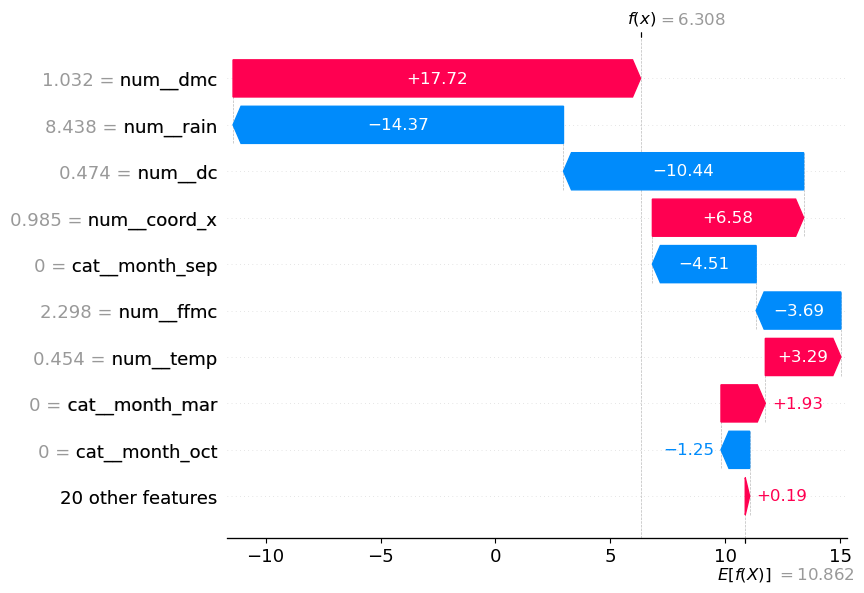

In [57]:
shap.plots.waterfall(shap_values[1])

SHAP Analysis and Feature Importance Conclusion
1. Select an Observation in Your Test Set and Explain the Most Important Features
For the selected observation in the test set, the SHAP waterfall plot indicates the following:

num_dmc: This feature has the largest positive impact (+17.72) on the prediction. This means that num_dmc significantly increases the predicted value.
num_rain: This feature has the largest negative impact (-14.37) on the prediction. This means that num_rain significantly decreases the predicted value.
num_dc: This feature has a significant negative impact (-10.44) on the prediction.
num_coord_x: This feature has a positive impact (+6.58) on the prediction.
Other features like cat_month_sep, num_ffmc, num_temp, etc., have smaller contributions, both positive and negative.
This plot effectively shows how each feature contributes to moving the prediction from the base value (expected value) to the final prediction for this specific observation.

2. In General, Across the Complete Training Set, Which Features are the Most and Least Important
Most Important Features: These are the features with the highest mean absolute SHAP values, indicating that they have the largest impact on the model's predictions. For example:

num_dmc
num_rain
num_dc
num_coord_x
Least Important Features: These are the features with the lowest mean absolute SHAP values, indicating they have minimal impact on the model's predictions. For the SHAP summary plot, a typical range for near-zero importance could be SHAP values within the range of -0.5 to 0.5.

3. If You Were to Remove Features from the Model, Which Ones Would You Remove? Why? How Would You Test That These Features are Actually Enhancing Model Performance?
Identify Features to Remove
Based on the SHAP summary plot, we can identify features with the lowest mean absolute SHAP values as the least important features to consider removing. These features contribute the least to the model's predictions.

Why Remove These Features?
Removing features that contribute little to the model's performance can simplify the model, reduce overfitting, and improve generalization. Simplifying the model by removing unimportant features can also lead to faster training times and easier interpretability.

*(Answer here.)*

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.